 **chp05_0406.ipynb ~ 이어서 해야함 !**

 1. gdrive mount(데이터 업로드)
 2. 데이터 폴더로 이동(데이터 불러오기 pandas)
 3. 데이터 전처리(수치화 & 정규화)
 4. 완전연결 네트워크 구성
 5. 학습
 6. 테스트(예측)
 7. 결과 upload

# 환경 설정


In [ ]:
from google.colab import files  # 파일 업로드를 위한 라이브러리 사용 선언
from google.colab import drive  # 구글 드라이브를 위한 라이브러리 사용 선언

In [ ]:
files.upload()  # 파일 업로드 실행

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yujeongyang","key":"79d486c94ed039cf803293adca468b3c"}'}

In [ ]:
!mkdir ~/.kaggle                      # 캐글 API 키를 넣을 폴더 생성
!mv kaggle.json ~/.kaggle/            # 생성된 폴더에 키 복사
!chmod 600 ~/.kaggle/*                # 폴더의 권한 조정
drive.mount('/content/gdrive')        # 구글 드라이브를 /content/gdrive 폴더에 연결

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive/Colab Notebooks/titanic_data'

/content/gdrive/MyDrive/Colab Notebooks/titanic_data


In [ ]:
!pwd
# 작업 폴더 변경 확인

In [ ]:
!kaggle competitions download -c titanic
# 데이터 다운로드 받기

In [ ]:
import pandas as pd

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# train 데이터 수치 및 정규화


In [ ]:
import numpy as np
data_len = data_train.shape[0]
data_train_np = np.zeros([data_len,8])

In [ ]:
data_len

891

In [ ]:
cnt = 0
sex_num = np.zeros(data_len)
for d in data_train['Sex']:
  if(d=='female'):
    sex_num[cnt] = 1
  cnt += 1

In [ ]:
sex_num = np.zeros(data_len)
for i, d in enumerate(data_train['Sex']):
  if(d=='female'):
    sex_num[i] = 1

In [ ]:
sex_num = np.zeros(data_len)
sex_num[np.array(data_train['Sex']=='female')]=1

In [ ]:
sex_num.shape

(891,)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
data_train_np[:,0:2] = to_categorical(sex_num) # one-hot-encoding 적용

In [ ]:
data_train_np[:,0:2]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# to_numpy() -> numpy 배열로 변경
# -1 ? -> to_numpy 결과로 Pclass가 1 ~ 4가 나옴.
# 따라서 -1 을 해주고 0 ~ 2 가 나오도록 설정함.
data_train_np[:,2:5] = to_categorical(data_train['Pclass'].to_numpy() - 1)

In [ ]:
data_train_np[:,5] = data_train['Age']/80
data_train_np[:,6] = data_train['SibSp']/10
data_train_np[:,7] = data_train['Parch']/10

In [ ]:
data_train_np

array([[1.   , 0.   , 0.   , ..., 0.275, 0.1  , 0.   ],
       [0.   , 1.   , 1.   , ..., 0.475, 0.1  , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.325, 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   , ...,   nan, 0.1  , 0.2  ],
       [1.   , 0.   , 1.   , ..., 0.325, 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.4  , 0.   , 0.   ]])

In [ ]:
np.sum(np.isnan(data_train_np[:,5]))

177

In [ ]:
data_train_np[np.isnan(data_train_np[:,5]),5] = 30/80

In [ ]:
data_train_np[5,:]

array([1.   , 0.   , 0.   , 0.   , 1.   , 0.375, 0.   , 0.   ])

In [ ]:
data_train_np_y = to_categorical(data_train['Survived'])

In [ ]:
data_train_np_y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# test 데이터 수치 및 정규화



survived 항목은 test 데이터에 없으므로 생략


In [ ]:
# 비어있는 numpy 배열 생성
test_data_len = data_test.shape[0]
data_test_np = np.zeros([test_data_len,8])

In [ ]:
# 성별데이터를 원-핫 인코딩
sex_num = np.zeros(data_test_np.shape[0])
sex_num[np.array(data_test['Sex']=='female')] = 1
data_test_np[:,0:2] = to_categorical(sex_num)

In [ ]:
# 객실등급데이터를 원-핫 인코딩
data_test_np[:,2:5] = to_categorical(data_test['Pclass'].to_numpy()-1)

In [ ]:
# 나이, 형제/배우자수, 부모/자녀수 정규화
data_test_np[:,5] = data_test['Age']/80
data_test_np[:,6] = data_test['SibSp']/10
data_test_np[:,7] = data_test['Parch']/10

In [ ]:
# nan값의 처리
data_test_np[np.isnan(data_test_np)] = 30/80

# 6.6 완전 연결층과 타이타닉 데이터


In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [ ]:
model = Sequential()
model.add(layers.Dense(units=8, activation='relu')) # 0보다 작은 값은 0, 다른 값은 그대로 출력
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax')) # 출력 노드들 합이 1이 되도록 조정

오버피팅?
-> train 데이터에는 적절하나, test 데이터에는 정확도가 떨어짐?

In [ ]:
# add해서 model은 생성함
# 이제 최적화 도구를 뭘 할지 선택해야함
# 원-핫 인코딩했으니까 -> categorical_crossentropy
# accuracy 가지고 평가하겠다.
model.compile(loss='categorical_crossentropy',
              optimizer = optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
hist = model.fit(data_train_np,data_train_np_y, epochs = 400,
                 batch_size=128, validation_split=0.3)
# validation_split -> 학습 데이터 내에서 학습 데이터와 검증 데이터로 나눌 수 있는데,
# 그중에서 70% 학습에, 30%는 검증에 사용하겠다!
# 학습 도중에 계속 테스트를 진행함
# 최종 테스트는 kaggle 업로드 하면서 진행됨

Epoch 1/400
5/5 [==============================] - 1s 73ms/step - loss: 0.6605 - accuracy: 0.5955 - val_loss: 0.6099 - val_accuracy: 0.6418
Epoch 2/400
5/5 [==============================] - 0s 17ms/step - loss: 0.6071 - accuracy: 0.6661 - val_loss: 0.5674 - val_accuracy: 0.7388
Epoch 3/400
5/5 [==============================] - 0s 10ms/step - loss: 0.5704 - accuracy: 0.7560 - val_loss: 0.5344 - val_accuracy: 0.7687
Epoch 4/400
5/5 [==============================] - 0s 15ms/step - loss: 0.5413 - accuracy: 0.7817 - val_loss: 0.5100 - val_accuracy: 0.7799
Epoch 5/400
5/5 [==============================] - 0s 11ms/step - loss: 0.5189 - accuracy: 0.7929 - val_loss: 0.4913 - val_accuracy: 0.7799
Epoch 6/400
5/5 [==============================] - 0s 11ms/step - loss: 0.5021 - accuracy: 0.7929 - val_loss: 0.4774 - val_accuracy: 0.7836
Epoch 7/400
5/5 [==============================] - 0s 11ms/step - loss: 0.4892 - accuracy: 0.7929 - val_loss: 0.4678 - val_accuracy: 0.7836
Epoch 8/400
5/5 [===

In [ ]:
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize=(15,10))   # 10x15 크기의 figure 생성
  loss_ax = plt.gca()                 # figure의 기본 축 가져오기
  acc_ax = loss_ax.twinx()            # 축을 1개 더 추가

  # 손실 변화 양상을 그래프로 표시
  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='lower left')

  # 정확도 변화 양상을 그래프로 표시
  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper left')

  plt.show()

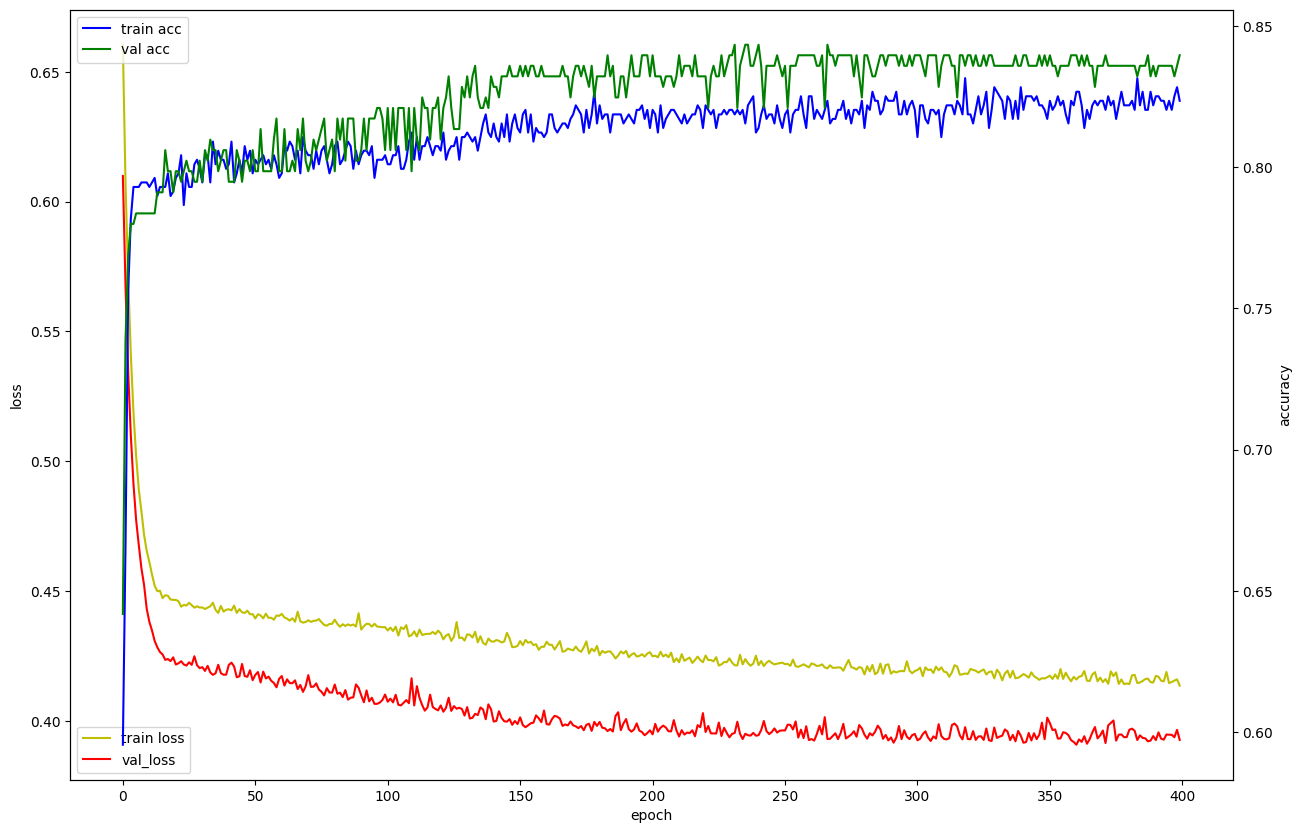

In [ ]:
# 학습 경과를 그래프로 그림
drawHistory(hist)

In [ ]:
o = model.predict(data_test_np)
# test 데이터를 파라미터로 받아,
# 해당 데이터에 대한 네트워크 출력을 반환

# predict -> 정답이 없는 데이터의 결과를 예측함.

# print(o) -> 실수형

14/14 [==============================] - 0s 2ms/step


In [ ]:
o = np.argmax(o, -1) # 2차원이기 때문에 1, -1 상관 없음
# 2개의 출력 노드 중, 큰 값이 있는 노드가 승객의 생존 여부(0,1) 나타냄

In [ ]:
o
# 0, 1로 바뀜

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
answer = np.zeros([418,2]) # numpy 배열
# 최종 제출할 파일
# 첫 번째 열 : 승객ID
answer[:,0] = data_test['PassengerId']
# 두 번째 열 : 생존 여부
answer[:,1] = o

In [ ]:
#배열 answer를 DataFrame 형식으로 변환하고, df_frame 변수에 저장
df_answer = pd.DataFrame(answer)
df_answer.columns = ['PassengerId','Survived']  # 각 열의 제목을 지정
df_answer = df_answer.astype('int32')           # 데이터를 정수형으로 바꿈
# 결과를 csv 파일로 저장(index는 제외)
df_answer.to_csv('test_predict.csv', index=False)

In [ ]:
!kaggle competitions submit -c titanic -f 'test_predict.csv' -m "0414_submission"

100% 2.77k/2.77k [00:00<00:00, 4.12kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster